<a href="https://colab.research.google.com/github/VrushaliSapkal/Data-Science-and-Analytics/blob/main/DSA_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Sapkal Vrushali Shantaram

Class : B.Tech

Div : A

Batch : AB4

Roll No : 16

Date : 22-11-2022

**Problem Statement :**

Trip History Analysis Using Machine Learning algorithm - KNN

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [152]:
data = pd.read_csv('/content/2010-capitalbikeshare-tripdata.csv')

In [153]:
data

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member
...,...,...,...,...,...,...,...,...,...
115592,2179,2010-12-31 23:20:32,2010-12-31 23:56:52,31110,20th St & Florida Ave NW,31623,Columbus Circle / Union Station,W00859,Casual
115593,953,2010-12-31 23:21:57,2010-12-31 23:37:50,31106,Calvert & Biltmore St NW,31401,14th St & Spring Rd NW,W00914,Member
115594,737,2010-12-31 23:27:28,2010-12-31 23:39:45,31602,Park Rd & Holmead Pl NW,31401,14th St & Spring Rd NW,W00973,Member
115595,514,2010-12-31 23:37:38,2010-12-31 23:46:12,31111,10th & U St NW,31202,14th & R St NW,W01119,Member


In [154]:
data.describe()


,Duration,Start station number,End station number
count,115597.000000,115597.000000,115597.000000
mean,1254.649956,31266.213431,31268.042250
std,2914.317998,187.645048,186.194316
min,60.000000,31000.000000,31000.000000
25%,403.000000,31110.000000,31111.000000
50%,665.000000,31213.000000,31214.000000
75%,1120.000000,31301.000000,31238.000000
max,85644.000000,31805.000000,31805.000000


In [155]:
# checking for missing values
data.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [156]:
data = data.drop(columns=['Start date', 'End date' , 'Start station' , 'End station', 'Bike number'])

In [157]:
print(data['Member type'].unique())

['Member' 'Casual' 'Unknown']


In [158]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [159]:
encoder.fit(data['Member type'])

LabelEncoder()

In [160]:
data['Member type'] = encoder.transform(data['Member type'])

In [161]:
data

,Duration,Start station number,End station number,Member type
0,1012,31208,31108,1
1,61,31209,31209,1
2,2690,31600,31100,1
3,1406,31600,31602,1
4,1413,31100,31201,1
...,...,...,...,...
115592,2179,31110,31623,0
115593,953,31106,31401,1
115594,737,31602,31401,1
115595,514,31111,31202,1


In [162]:
#select all columns except the last for all rows
X=data.iloc[:,:-1].values
#select the last columns of all rows
Y=data.iloc[:, -1].values

print(X.shape)
print('----------------------')
print(Y.shape)

(115597, 3)
----------------------
(115597,)


In [163]:
data['Member type'] = data['Member type'].astype(int)


In [164]:
from sklearn.model_selection import train_test_split

#train test split method
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

In [165]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [166]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [167]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, y_pred)

In [168]:
cm


array([[ 3420,  3823,     0],
       [ 1488, 25947,     0],
       [    0,     2,     0]])

In [170]:
from sklearn import metrics
KNN= metrics.accuracy_score(Y_test, y_pred) * 100
print("\n The Accuracy Score Using Algorithm KNN Classifier: ", KNN)


 The Accuracy Score Using Algorithm KNN Classifier:  84.67993079584775


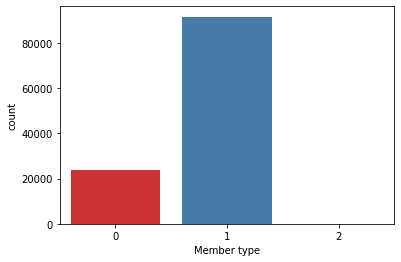

In [171]:
#plotting the graph  
sns.countplot(x='Member type',data=data ,palette='Set1')  
plt.show()  